<a href="https://colab.research.google.com/github/VDidyk/AI/blob/master/module4/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BC%D0%B5%D1%80%D0%B5%D0%B6%D1%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [73]:
import pandas as pd
import torch
import pandas as pd

device = "cpu"
torch.set_default_device(device)

Дані про морське вухо(молюск)

<div>
<img src="https://m.media-amazon.com/images/I/81-FC5TlLtL.jpg" width="500"/>
</div>

In [74]:
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/abalone.csv')
df.drop(columns=['Type', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'], inplace=True)

In [75]:
df.head()

,LongestShell,Diameter,Height,Rings
0,0.455,0.365,0.095,15
1,0.350,0.265,0.090,7
2,0.530,0.420,0.135,9
3,0.440,0.365,0.125,10
4,0.330,0.255,0.080,7


Потрібно на основі розмірів молюска спрогнозувати кількість кілець в мушлі `Rings`. Використовуйте процесор cpu

# Завдання 1
Створіть клас Dataset

In [76]:
from torch.utils.data import Dataset


class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values).to(device)
      self.y = torch.FloatTensor(y.values).to(device)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['Rings'])
y = df['Rings']

dataset = MyDataset(X, y)


# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [77]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=True,
                        generator=torch.Generator(device=device))

In [78]:
X_batch, y_batch = next(iter(dataloader))
X_batch.shape

torch.Size([128, 3])

In [79]:
torch.Size([128, 2])
y_batch.shape

torch.Size([128, 1])

In [80]:
torch.Size([128, 1])
X_batch.device

device(type='cpu')

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-3
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [81]:
from torch import nn


model = nn.Sequential(
    nn.Linear(3, 2),
    nn.ReLU(),
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1)
)

model

Sequential(
  (0): Linear(in_features=3, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [82]:
from torchsummary import summary

summary(model, input_size=(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 2]               8
              ReLU-2                    [-1, 2]               0
            Linear-3                    [-1, 4]              12
              ReLU-4                    [-1, 4]               0
            Linear-5                    [-1, 1]               5
Total params: 25
Trainable params: 25
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Завдання 4
Визначте функцію втрат та оптимізатор

In [83]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [84]:
import numpy as np

num_epochs = 100

losses=[]
for epoch in range(num_epochs):
  losses_ = []
  for X_batch, y_batch in dataloader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        losses_.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

  losses.append(np.mean(losses_))

  if epoch % 1 == 0:
          print(f'loss={losses[-1]}')

#Чомусь кожен раз як я запускаю - лос зменшується. На пошатку був біля 100, і після додаткових запусків доходило до 8. Тобто з кожним кліком запускається нова ітерація і нові епохи донавчають модель?

loss=91.51951321688566
loss=71.2162822376598
loss=45.93839963277181
loss=22.494339538343024
loss=12.14214920275139
loss=10.367820667498039
loss=10.315268603238193
loss=10.265585075725209
loss=10.201344186609441
loss=10.128719662175033
loss=10.089543270342277
loss=10.056181864304977
loss=10.04129594745058
loss=10.002601291194107
loss=9.943655201883027
loss=9.988052353714451
loss=9.89224910736084
loss=9.874735832214355
loss=9.794738798430473
loss=9.79583117456147
loss=9.735714623422334
loss=9.653580838983709
loss=9.616247350519354
loss=9.596983692862771
loss=9.567618254459266
loss=9.465665730563076
loss=9.40356276252053
loss=9.38862063667991
loss=9.320540803851504
loss=9.256143974535393
loss=9.210181164019035
loss=9.134345921603115
loss=9.062878839897387
loss=8.982279372937752
loss=8.944604050029408
loss=8.858861157388398
loss=8.846691247188684
loss=8.789924101396041
loss=8.670155799750125
loss=8.599112380634654
loss=8.507191773616906
loss=8.453883619019479
loss=8.423896500558564
loss=8.

(0.0, 100.0)

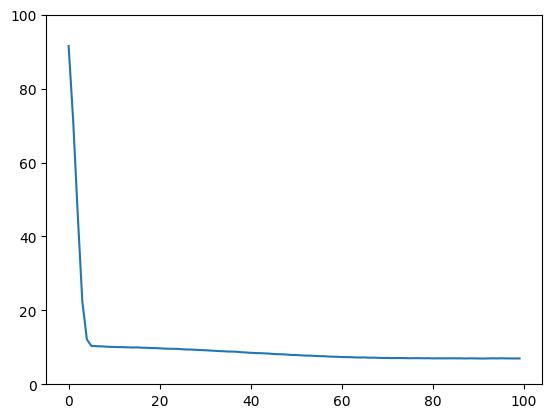

In [85]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylim(0, 100)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [86]:
torch.save(model, 'model.pt')

In [87]:
load_model = torch.load('model.pt')

In [95]:
y[0]

15

In [96]:
X_data = torch.FloatTensor(X.values[[0]])
X_data = X_data.to(device)

print(X_data)
print(X_data.shape)

tensor([[0.4550, 0.3650, 0.0950]])
torch.Size([1, 3])


In [98]:
load_model(X_data)

tensor([[8.8971]], grad_fn=<AddmmBackward0>)

In [100]:
with torch.no_grad(): # без градієнтів
  print(load_model(X_data))

tensor([[8.8971]])
